# Potato Disease Classification Model (CNN)

In [ ]:
%cd /content/drive/MyDrive/PlantVillage/PlantVillage

/content/drive/MyDrive/PlantVillage/PlantVillage


In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [ ]:
# !kaggle datasets download -d arjuntejaswi/plant-village


In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [ ]:
directory_path = "/content/drive/MyDrive/PlantVillage/PlantVillage"


load the data usng batches


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2167 files belonging to 3 classes.


In [ ]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

# Visualisation

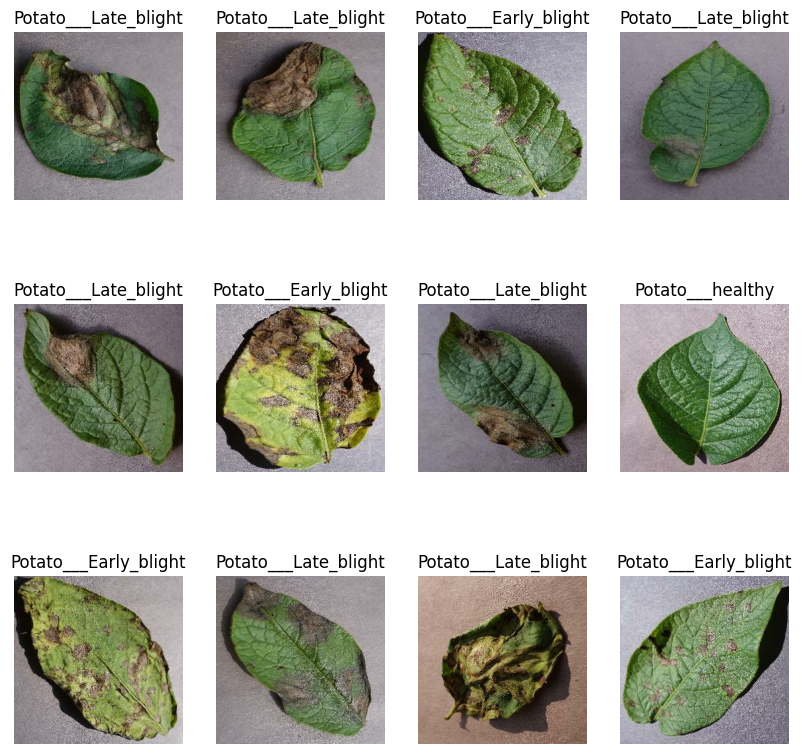

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    #print(image_batch[0].numpy())
    plt.axis("off")






# Test and training data  split

80% ==>training
20% ==>10% validation , 10% test(used to check the accuracy of the model)


In [ ]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds = dataset.take(54) #training dataset
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [ ]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_dataset_partition_tf(ds, train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size=len(dataset)

  if shuffle:
    ds=ds.shuffle(shuffle_size, seed=12)


  train_size=int(train_split *ds_size)
  val_size=int(val_split*ds_size)

  train_ds=ds.take(train_size)

  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)
  return train_ds, val_ds, test_ds

In [ ]:
train_ds , val_ds, test_ds =get_dataset_partition_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(test_ds)

8

In [ ]:
len(val_ds)

6

# Catching and Prefetching


In [ ]:

#read tehe image in the disk
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

# Data Augmentation
data preprocessing done here


In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

# Build the model

In [ ]:
input_shape= (BATCH_SIZE,IMAGE_SIZE , IMAGE_SIZE , CHANNELS)
n_classes=3

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu' , input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),






])

model.build(input_shape=input_shape)

In [ ]:
model.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_5 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [137]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 380s 4s/step - loss: 0.9000 - accuracy: 0.4815 - val_loss: 0.7871 - val_accuracy: 0.4844
Epoch 2/50
54/54 [==============================] - 212s 4s/step - loss: 0.7449 - accuracy: 0.6262 - val_loss: 0.8601 - val_accuracy: 0.4844
Epoch 3/50
54/54 [==============================] - 212s 4s/step - loss: 0.5520 - accuracy: 0.7459 - val_loss: 0.6877 - val_accuracy: 0.5990
Epoch 4/50
54/54 [==============================] - 215s 4s/step - loss: 0.4523 - accuracy: 0.8044 - val_loss: 0.2577 - val_accuracy: 0.9115
Epoch 5/50
54/54 [==============================] - 212s 4s/step - loss: 0.2781 - accuracy: 0.8819 - val_loss: 0.1984 - val_accuracy: 0.9115
Epoch 6/50
54/54 [==============================] - 208s 4s/step - loss: 0.2491 - accuracy: 0.8987 - val_loss: 0.1993 - val_accuracy: 0.9271
Epoch 7/50
54/54 [==============================] - 208s 4s/step - loss: 0.1698 - accuracy: 0.9427 - val_loss: 0.3670 - val_accuracy: 0.8698
Epoch 8/50
54

In [138]:
scores=model.evaluate(test_ds)


54/54 [==============================] - 57s 1s/step - loss: 0.0689 - accuracy: 0.9740


In [139]:
scores

[0.06893537938594818, 0.9739583134651184]

In [140]:
history

In [141]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [142]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [144]:
history.history['accuracy']

[0.48148149251937866,
 0.6261574029922485,
 0.7459490895271301,
 0.8043981194496155,
 0.8819444179534912,
 0.8987268805503845,
 0.9427083134651184,
 0.9299768805503845,
 0.9409722089767456,
 0.9409722089767456,
 0.9265046119689941,
 0.9357638955116272,
 0.9346064925193787,
 0.9635416865348816,
 0.9577546119689941,
 0.96875,
 0.9722222089767456,
 0.9797453880310059,
 0.9756944179534912,
 0.9716435074806213,
 0.9606481194496155,
 0.9606481194496155,
 0.9693287014961243,
 0.9820601940155029,
 0.9803240895271301,
 0.9814814925193787,
 0.9739583134651184,
 0.9722222089767456,
 0.9797453880310059,
 0.9913194179534912,
 0.9832175970077515,
 0.9733796119689941,
 0.9739583134651184,
 0.9878472089767456,
 0.9791666865348816,
 0.9797453880310059,
 0.9855324029922485,
 0.9837962985038757,
 0.9884259104728699,
 0.9837962985038757,
 0.9953703880310059,
 0.9907407164573669,
 0.9820601940155029,
 0.9878472089767456,
 0.9849537014961243,
 0.9820601940155029,
 0.9895833134651184,
 0.9895833134651184,
 0

[0.48148149251937866,
 0.6261574029922485,
 0.7459490895271301,
 0.8043981194496155,
 0.8819444179534912,
 0.8987268805503845,
 0.9427083134651184,
 0.9299768805503845,
 0.9409722089767456,
 0.9409722089767456,
 0.9265046119689941,
 0.9357638955116272,
 0.9346064925193787,
 0.9635416865348816,
 0.9577546119689941,
 0.96875,
 0.9722222089767456,
 0.9797453880310059,
 0.9756944179534912,
 0.9716435074806213,
 0.9606481194496155,
 0.9606481194496155,
 0.9693287014961243,
 0.9820601940155029,
 0.9803240895271301,
 0.9814814925193787,
 0.9739583134651184,
 0.9722222089767456,
 0.9797453880310059,
 0.9913194179534912,
 0.9832175970077515,
 0.9733796119689941,
 0.9739583134651184,
 0.9878472089767456,
 0.9791666865348816,
 0.9797453880310059,
 0.9855324029922485,
 0.9837962985038757,
 0.9884259104728699,
 0.9837962985038757,
 0.9953703880310059,
 0.9907407164573669,
 0.9820601940155029,
 0.9878472089767456,
 0.9849537014961243,
 0.9820601940155029,
 0.9895833134651184,
 0.9895833134651184,
 0

In [152]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']



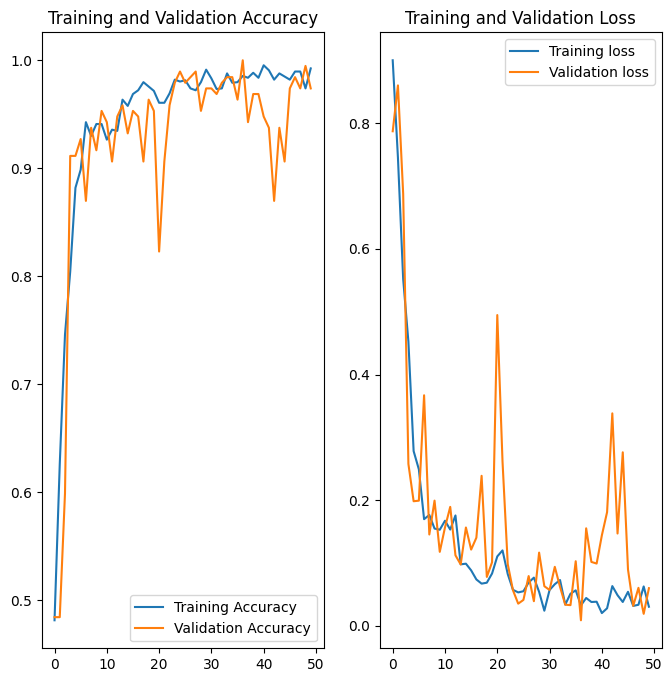

In [151]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [159]:
np.argmax([9.9999964e-01,3.9333537e-07,1.1586251e-18])

0

first image to predict
first image actual label Potato___Late_blight
1/1 [==============================] - 1s 977ms/step
predicted Label: Potato___Late_blight


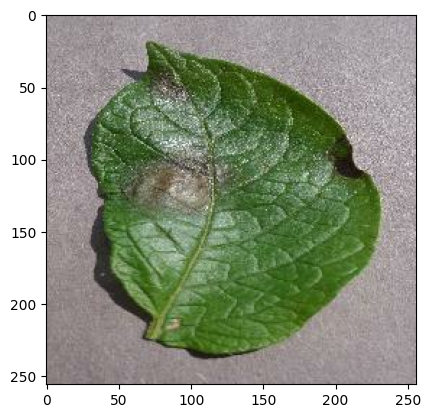

In [177]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):

  first_image=images_batch[0].numpy().astype('uint8')
  first_label=label_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("first image actual label",class_names[first_label])

  batch_prediction =model.predict(images_batch)
  print("predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [175]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)

  predictions =model.predict(img_array)

  predicted_class=class_names[np.argmax(predictions[0])]
  confidence=round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

1/1 [==============================] - 0s 45ms/step


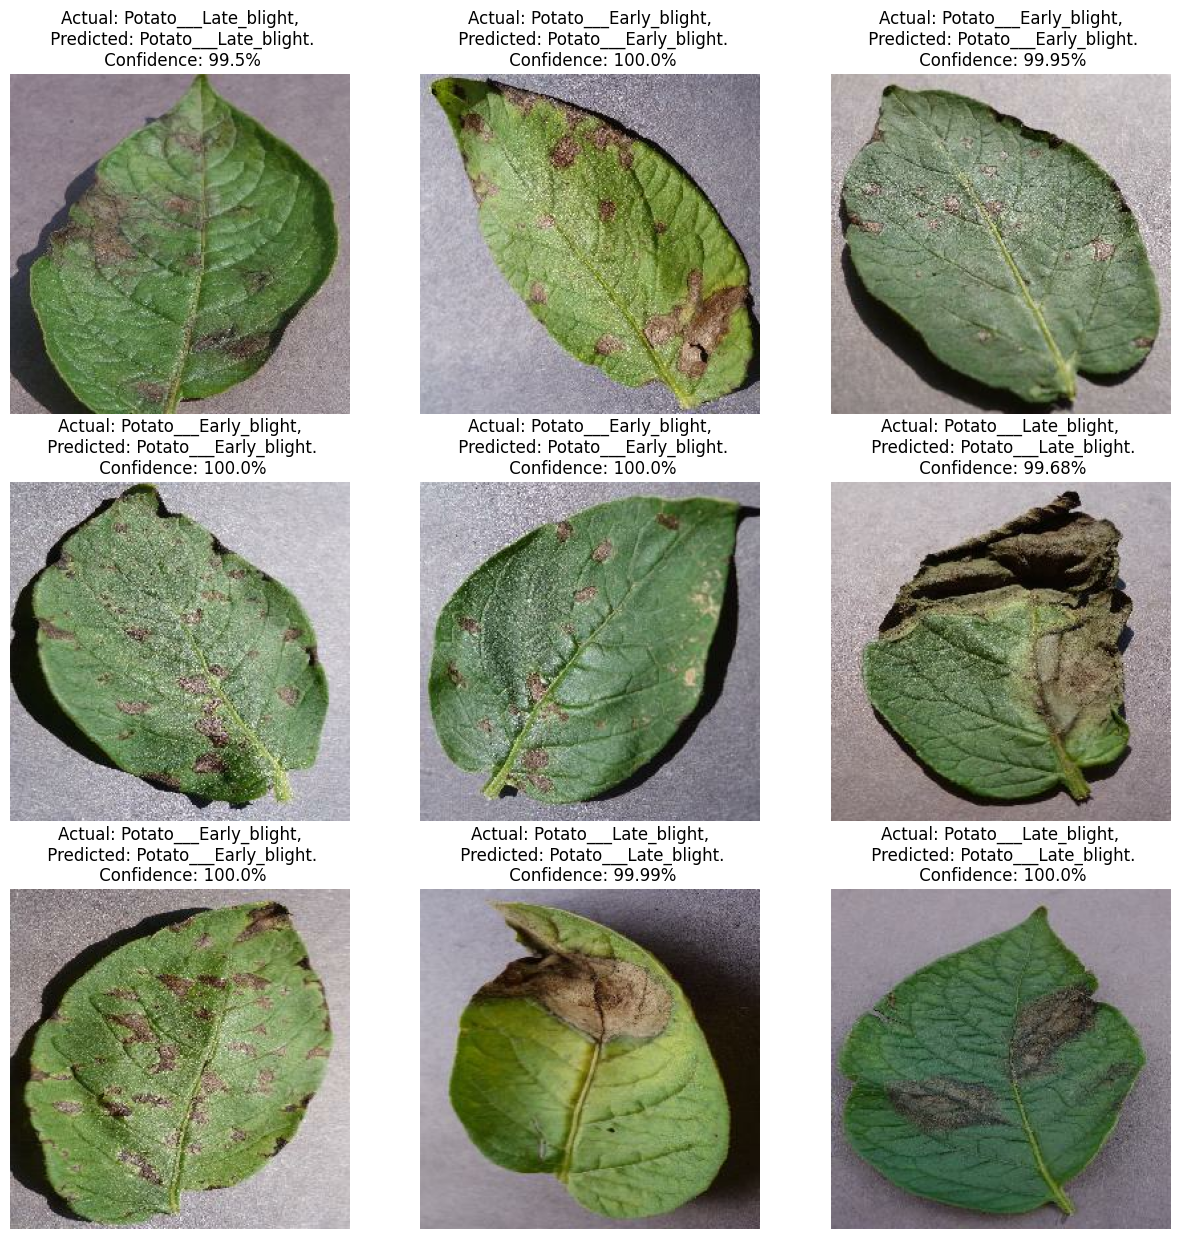

In [176]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")